In [38]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7

### Задание 1
Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

- Как критики относятся к спортивным играм?
- Критикам нравятся больше игры на PC или на PS4?
- Критикам больше нравятся стрелялки или стратегии?


Для каждого вопроса:

- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.


#### Как критики относятся к спортивным играм?

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')

In [3]:
#Преобразуем наш начальный DataFrame и почистим его от NaN. 
# Так как количество NAN в строкас количеством и значением оценок совпадает, можем их просто удалить.

games = df[['Genre', 'Critic_Score', 'Critic_Count']].copy()
games['Total_Score'] = games['Critic_Count'] * games['Critic_Score']
games.dropna(axis=0, inplace=True)
games.head()

,Genre,Critic_Score,Critic_Count,Total_Score
0,Sports,76.0,51.0,3876.0
2,Racing,82.0,73.0,5986.0
3,Sports,80.0,73.0,5840.0
6,Platform,89.0,65.0,5785.0
7,Misc,58.0,41.0,2378.0


In [4]:
# Сделаем фильтры под каждый жанр игры, для дисперсионного анализа
Action = games[games['Genre'] == 'Action']
Sports = games[games['Genre'] == 'Sports']
Shooter = games[games['Genre'] == 'Shooter']
Racing = games[games['Genre'] == 'Racing']
Role = games[games['Genre'] == 'Role-Playing']
Misc = games[games['Genre'] == 'Misc']
Platform = games[games['Genre'] == 'Platform']
Fighting = games[games['Genre'] == 'Fighting']
Simulation = games[games['Genre'] == 'Simulation']
Adventure = games[games['Genre'] == 'Adventure']
Strategy = games[games['Genre'] == 'Strategy']
Puzzle = games[games['Genre'] == 'Puzzle']

In [5]:
# Дисперсионный анализ. Результат - отколняем нулевую гипотезу.
f_value_1, p_value_1 = st.f_oneway(Action['Total_Score'], Sports['Total_Score'], Shooter['Total_Score'], Racing['Total_Score'], \
                      Role['Total_Score'], Misc['Total_Score'], Platform['Total_Score'], Fighting['Total_Score'], \
                      Simulation['Total_Score'], Adventure['Total_Score'], Strategy['Total_Score'], Puzzle['Total_Score'])

print(f"Статистика = {f_value_1:.5f}, p = {p_value_1:.10f}")

if p_value_1 > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 42.96973, p = 0.0000000000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [6]:
# Преобразуем данные и подсчитаем среднее, для дальнейшей визуализации оценок критиков в зависимости от жанра
# Видим, что среднее выше у игр жанра спорт.
mean_score = games.groupby('Genre')[['Critic_Score', 'Critic_Count']].sum()
mean_score['Mean'] = mean_score['Critic_Score'] / mean_score['Critic_Count']
mean_score.sort_values('Mean')

,Critic_Score,Critic_Count,Mean
Genre,,,
Shooter,66251.0,33616.0,1.970817
Role-Playing,53545.0,23945.0,2.236166
Action,125929.0,52506.0,2.398374
Fighting,28310.0,11415.0,2.480070
Strategy,21770.0,8538.0,2.549777
Platform,33825.0,11778.0,2.871880
Racing,50429.0,17087.0,2.951308
Adventure,21102.0,7143.0,2.954221
Misc,34842.0,11262.0,3.093767


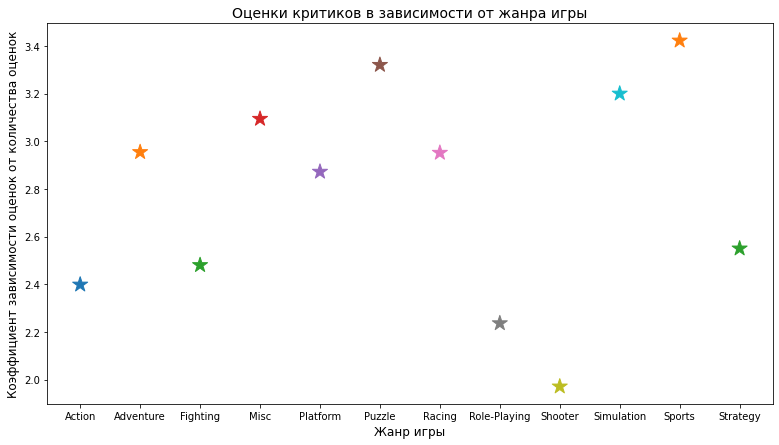

In [39]:
plt.scatter(x=mean_score.index, y=mean_score['Mean'], s=250, marker ='*', 
            c=(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', \
                '#17becf', '#ff7f0e', '#2ca02c']))
plt.title('Оценки критиков в зависимости от жанра игры', fontdict={'size':14})
plt.xlabel("Жанр игры", fontdict={'size':12})
plt.ylabel("Коэффициент зависимости оценок от количества оценок", fontdict={'size':12})
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

#### Критикам нравятся больше игры на PC или на PS4?

In [8]:
# Генерируем рабочие данные
platform = df[['Platform', 'Critic_Score', 'Critic_Count']].copy()
platform.dropna(axis=0, inplace=True)
PC = platform[platform['Platform'] == 'PC']
PS4 = platform[platform['Platform'] == 'PS4']

In [9]:
# Тест Стьюдента для 2-х выборок
stat_2, p_value_2 = st.ttest_ind(PC['Critic_Score'], PS4['Critic_Score'])

print(f"Статистика = {stat_2:.5f}, p = {p_value_2:.10f}")

if p_value_2 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 4.54411, p = 0.0000062158
Отклоняем нулевую гипотезу, средние, вероятно, различаются


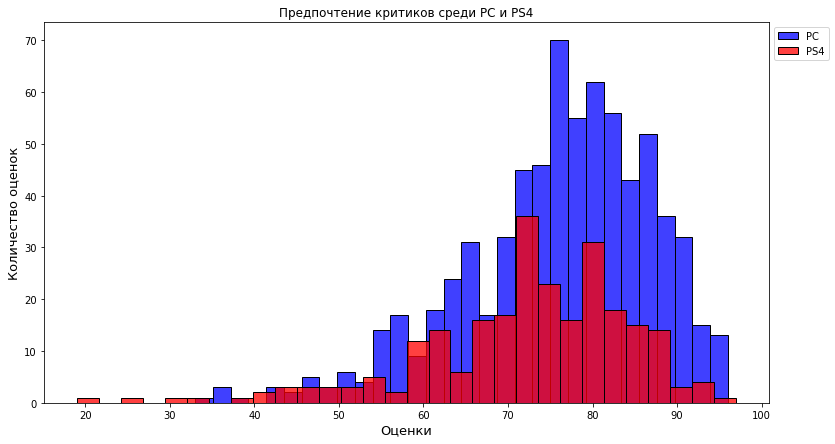

In [40]:
# Визуализируем и видим, что для PC, оценкок критиков больше. И вроде даже оценки эти выше (хотя однозначно сказать сложно)
sns.histplot(PC['Critic_Score'], bins=30, color='blue')
sns.histplot(PS4['Critic_Score'], bins=30, color='red')
plt.title('Предпочтение критиков среди PC и PS4')
plt.xlabel('Оценки', fontdict={'size':13})
plt.ylabel('Количество оценок', fontdict={'size':13})
plt.legend(['PC', 'PS4'], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

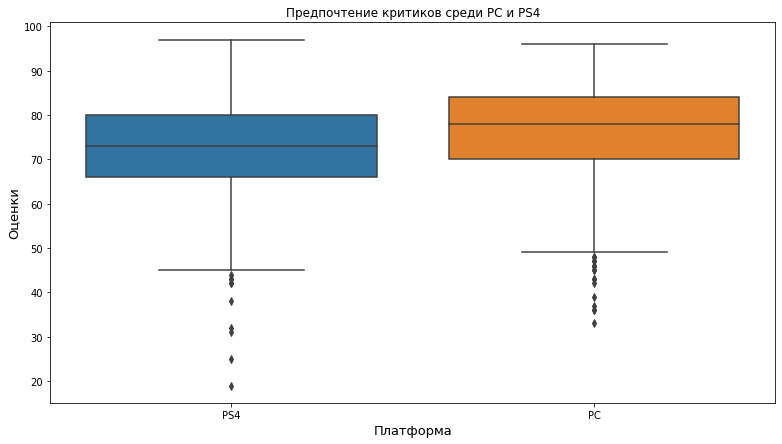

In [41]:
# Мы видим, что оценки критиков для PC в среднем выше, чем для PS4
for_scatter = platform.loc[(platform['Platform']=='PC') | (platform['Platform']=='PS4')]
sns.boxplot(x='Platform', y='Critic_Score', data=platform[platform['Platform'].isin(['PC', 'PS4'])])
plt.title('Предпочтение критиков среди PC и PS4')
plt.xlabel('Платформа', fontdict={'size':13})
plt.ylabel('Оценки', fontdict={'size':13})
plt.show()

#### Критикам больше нравятся стрелялки или стратегии?

In [12]:
# Подготавливаем данные
shoot_or_strategy = df[['Genre', 'Critic_Score', 'Critic_Count']].copy()
shoot_or_strategy.dropna(axis=0, inplace=True)
shooter = shoot_or_strategy.loc[shoot_or_strategy['Genre']=='Shooter']
strategy = shoot_or_strategy.loc[shoot_or_strategy['Genre']=='Strategy']

In [13]:
# Делаем парный тест Стьюдента и отклоняем нулевую гипотезу. Стоит отметить, что p-value, почти, 0.04, что свидетельствует 
# о том, что при уровне более низком уровне значимости, скажем в 0.01, гипотезу мы бы не отклоняли.
stat_3, p_value_3 = st.ttest_ind(shooter['Critic_Score'], strategy['Critic_Score'])

print(f"Статистика = {stat_3:.5f}, p = {p_value_3:.10f}")

if p_value_3 > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -2.06670, p = 0.0389687130
Отклоняем нулевую гипотезу, средние, вероятно, различаются


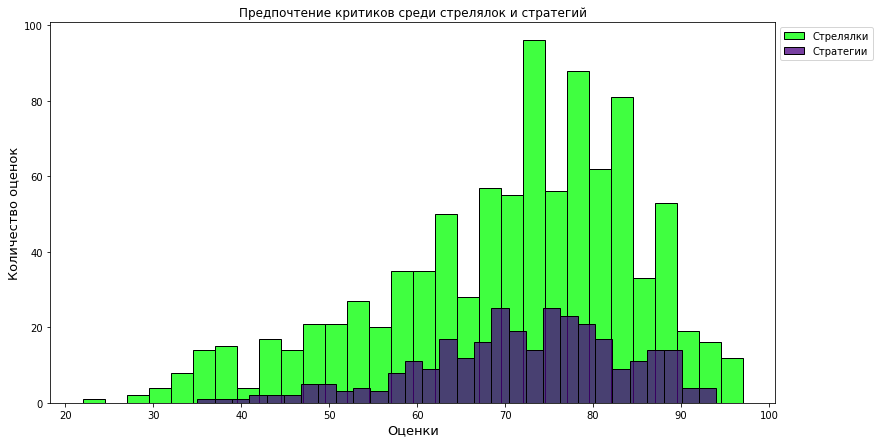

In [42]:
# Из визуализации на гистограммах очевидно больше количество самих оценок, что говорит о большей популярности. 
# но дать адекватную оценку среднему здесь затруднительно.
sns.histplot(shooter['Critic_Score'], bins=30, color='lime')
sns.histplot(strategy['Critic_Score'], bins=30, color='indigo')
plt.title('Предпочтение критиков среди стрелялок и стратегий')
plt.xlabel('Оценки', fontdict={'size':13})
plt.ylabel('Количество оценок', fontdict={'size':13})
plt.legend(['Стрелялки', 'Стратегии'], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

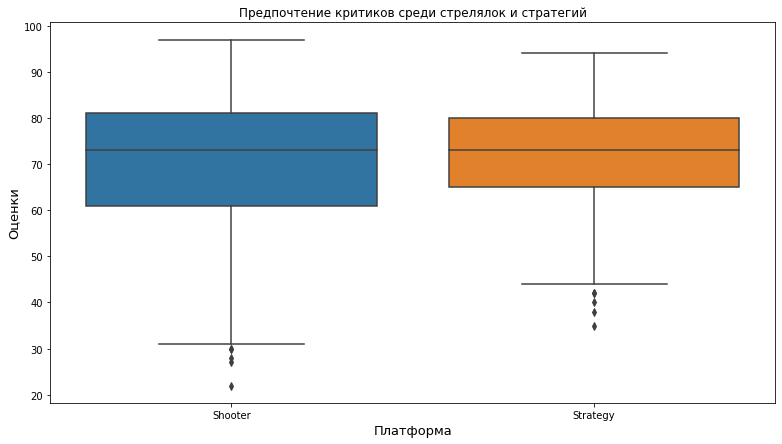

In [43]:
# Мы видим, что оценки, что дисперсия по обеим границам выше у Стрелялок, но опять же не ясно, у кого выше средний балл.
for_scatter_1 = shoot_or_strategy.loc[(shoot_or_strategy['Genre']=='Shooter') | (shoot_or_strategy['Genre']=='Strategy')]
sns.boxplot(x='Genre', y='Critic_Score', data=shoot_or_strategy[shoot_or_strategy['Genre'].isin(['Shooter', 'Strategy'])])
plt.title('Предпочтение критиков среди стрелялок и стратегий')
plt.xlabel('Платформа', fontdict={'size':13})
plt.ylabel('Оценки', fontdict={'size':13})
plt.show()

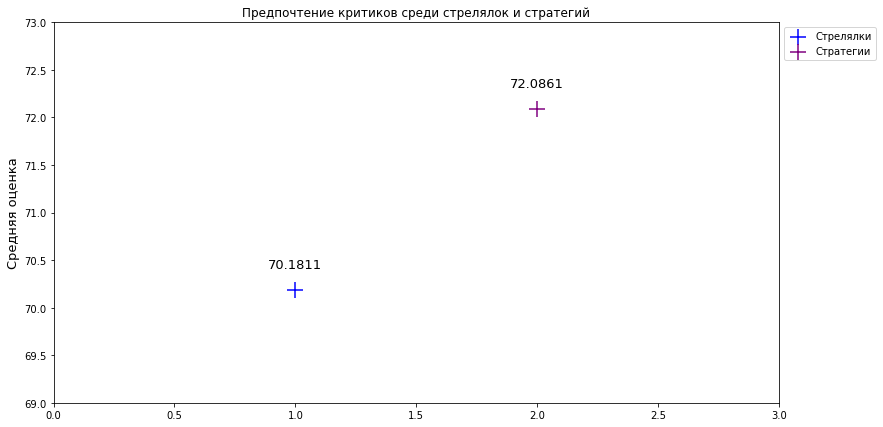

In [44]:
# Среднее выше у Стратегий. Вывод, что критикам все же больше нравятся Стратегии.
plt.scatter(x=1, y=shooter['Critic_Score'].mean(), s=250, marker='+', color='blue')
plt.scatter(x=2, y=strategy['Critic_Score'].mean(), s=250, marker='+', color='purple')

plt.title('Предпочтение критиков среди стрелялок и стратегий')
plt.ylabel('Средняя оценка', fontdict={'size':13})
plt.xlim(0, 3)
plt.ylim(69, 73)
plt.text(x=1, y=shooter['Critic_Score'].mean()+0.2, s=round(shooter['Critic_Score'].mean(), 4), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':13})
plt.text(x=2, y=strategy['Critic_Score'].mean()+0.2, s=round(strategy['Critic_Score'].mean(), 4), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':13})
plt.legend(['Стрелялки', 'Стратегии'], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

### Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;

2) Удалите мусорные символы;

3) Удалите стоп-слова;

4) Привидите все слова к нормальной форме;

5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() 

tfidf_matrix = tfidf.fit_transform(df.Message)

names = tfidf.get_feature_names_out()

tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)


Можете поэкспериментировать с параметрами TfidfVectorizer;

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [51]:
import re
log_df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
log_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [52]:
# Привидите весь текст к нижнему регистру
log_df['Message'] = log_df['Message'].apply(str.lower)

In [53]:
# Удалите мусорные символы
log_df['Message'] = [re.sub('[\W_]+', ' ', text) for text in log_df['Message'].values]

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [20]:
# Удалите стоп-слова
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

log_df['Message'] = [text.split() for text in log_df['Message'].values]
log_df['Message'] = [[word for word in text if word not in stopwords_set] for text in log_df['Message'].values]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\voron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Привидите все слова к нормальной форме
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
log_df['Message'] = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in log_df['Message'].values]
log_df['Message'] = [' '.join(list_of_words) for list_of_words in log_df['Message'].values]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\voron\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\voron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
# Преобразуйте все сообщения в вектора TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(log_df['Message'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [24]:
# Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, log_df['Category'], test_size = 0.3, random_state=42)

In [25]:
# Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
# Опишите результаты при помощи confusion_matrix;
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])
cm

array([[1445,    3],
       [  66,  158]], dtype=int64)

In [27]:
# Опишем наши результаты.
# Точность
precision = (confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])[0][0]) / ((confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])[0][0]) + (confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])[0][1]))
print(f'Точность нашей модели по прогнозированию спам/не спам: {precision:.6f}\
\nУ нас получился высокий показатель, мы прделали хорошую работу')

# Параметры матрицы
true_positive = confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])[0][0]
false_positive = confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])[0][1]
false_negative = confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])[1][0]
true_negative = confusion_matrix(y_true, y_pred, labels=['ham', 'spam'])[1][1]

print()
print(f'Истино-положительное решение: {true_positive}\nИстино-отрицательное решение: {true_negative}\n\
Ошибка 1-го типа: {false_positive}\nОшибка 2-го типа: {false_negative}')

Точность нашей модели по прогнозированию спам/не спам: 0.997928
У нас получился высокий показатель, мы прделали хорошую работу

Истино-положительное решение: 1445
Истино-отрицательное решение: 158
Ошибка 1-го типа: 3
Ошибка 2-го типа: 66


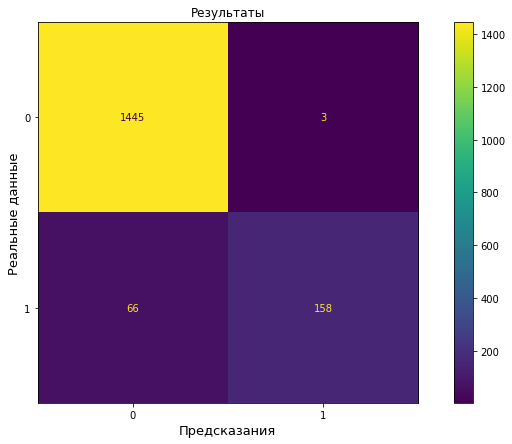

In [45]:
# Визуализация
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Результаты')
plt.xlabel('Предсказания', fontdict={'size':13})
plt.ylabel('Реальные данные', fontdict={'size':13})
plt.show()

In [29]:
# Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно 
# (с указанием фактического и предсказанного).

In [30]:
spam_or_not = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
spam_or_not.reset_index(inplace=True)
spam_or_not.columns = ['id', 'Category', 'Message']

In [31]:
true = pd.DataFrame(y_true)
true.reset_index(inplace=True)
true.columns = ['id', 'Category']

pred = pd.DataFrame(y_pred)

In [32]:
joined = true.join(pred, how='outer') 
joined.columns = ['id', 'Category', 'Prediction']
joined['Predict'] = 0
joined['Predict'].loc[(joined['Category'] == joined['Prediction'])] = 1
falses = joined.loc[joined['Predict'] == 0]
falses.drop(columns=['Category', 'Prediction'], inplace=True)

D:\DataSci\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\DataSci\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
total = spam_or_not.join(falses, on='id', lsuffix='_true', rsuffix='_false', how='left')
total.dropna(axis=0, inplace=True)
total.drop(columns=['id_true', 'id_false'], inplace=True)

total['Predict'].loc[(total['Category'] == 'ham')] = 'spam' 
total['Predict'].loc[(total['Category'] == 'spam')] = 'ham' 

In [56]:
total

,Category,Message,Predict
17,ham,Eh u remember how 2 spell his name... Yes i di...,spam
40,ham,Pls go ahead with watts. I just wanted to be s...,spam
47,ham,"Fair enough, anything going on?",spam
74,ham,U can call me now...,spam
84,ham,Yup next stop.,spam
...,...,...,...
1525,ham,Hi:)cts employee how are you?,spam
1567,ham,I am late. I will be there at,spam
1569,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,spam
1576,ham,"Sounds gd... Haha... Can... Wah, u yan jiu so ...",spam
